In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Program 8-1 Load Time-Series Data

In [2]:
# 코인데스크 사이트에서 다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


In [3]:
coindesk_data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048
...,...,...,...,...,...,...
360,BTC,2020-02-24,9919.551448,9689.085992,10008.540472,9666.519497
361,BTC,2020-02-25,9640.469505,9921.048562,10008.378491,9480.185942
362,BTC,2020-02-26,9392.869629,9640.468562,9679.595090,9251.115834
363,BTC,2020-02-27,8787.978363,9392.868579,9393.864137,8626.935746


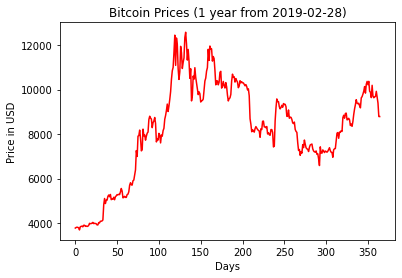

In [4]:
# 그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [5]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [6]:
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


## Program 8-2 Coin Price Prediction using LSTM

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

In [9]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [15]:
len(y_train), len(y_test)

(250, 108)

In [10]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 2s - loss: 1893.1771 - mae: 1893.1771 - val_loss: 415.2799 - val_mae: 415.2799 - 2s/epoch - 9ms/step
Epoch 2/200
250/250 - 2s - loss: 474.5037 - mae: 474.5037 - val_loss: 317.4341 - val_mae: 317.4341 - 2s/epoch - 6ms/step
Epoch 3/200
250/250 - 2s - loss: 480.7464 - mae: 480.7464 - val_loss: 259.4854 - val_mae: 259.4854 - 2s/epoch - 6ms/step
Epoch 4/200
250/250 - 2s - loss: 457.2088 - mae: 457.2088 - val_loss: 329.7875 - val_mae: 329.7875 - 2s/epoch - 6ms/step
Epoch 5/200
250/250 - 2s - loss: 484.2142 - mae: 484.2142 - val_loss: 334.9425 - val_mae: 334.9425 - 2s/epoch - 6ms/step
Epoch 6/200
250/250 - 2s - loss: 477.4022 - mae: 477.4022 - val_loss: 319.0613 - val_mae: 319.0613 - 2s/epoch - 6ms/step
Epoch 7/200
250/250 - 2s - loss: 490.5798 - mae: 490.5798 - val_loss: 358.0962 - val_mae: 358.0962 - 2s/epoch - 6ms/step
Epoch 8/200
250/250 - 2s - loss: 490.1143 - mae: 490.1143 - val_loss: 310.6750 - val_mae: 310.6750 - 2s/epoch - 6ms/step
Epoch 9/200
250/250 - 2s - los

In [11]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 213.4898681640625 MAE: 213.4898681640625
4/4 [==============================] - 0s 3ms/step
평균절댓값백분율오차(MAPE): [0.02607462]


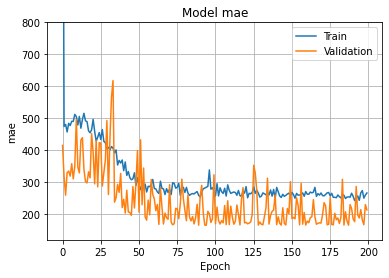

In [12]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

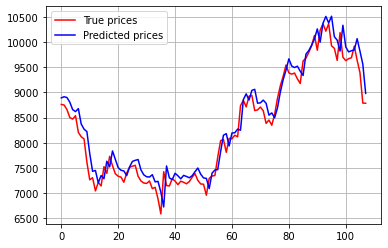

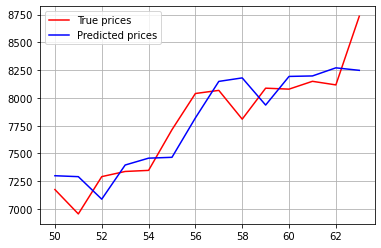

In [13]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

## Program 8-2-2 Coin Price Prediction using LSTM with train: last 70% and test: first 30%

In [55]:
# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]


In [65]:
# # 훈련 집합과 테스트 집합으로 분할
# split=int(len(X)*0.3)
# x_train=X[split+1:]; y_train=Y[split+1:]
# x_test=X[0:split+1]; y_test=Y[0:split+1]

# 훈련 집합과 테스트 집합으로 분할
split_1=int(len(X)*0.3)
split_2=int(len(X)*0.6)+1
x_train=X[0:split_1]; y_train=Y[0:split]

x_train = np.vstack((X[0:split_1], X[split_2:]))
y_train = np.vstack((Y[0:split_1], Y[split_2:]))

x_test=X[split_1:split_2]; y_test=Y[split_1:split_2]


In [66]:
len(y_train), len(y_test)

(250, 108)

In [67]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 2s - loss: 1055.6932 - mae: 1055.6932 - val_loss: 697.5757 - val_mae: 697.5757 - 2s/epoch - 9ms/step
Epoch 2/200
250/250 - 2s - loss: 414.9182 - mae: 414.9182 - val_loss: 789.3457 - val_mae: 789.3457 - 2s/epoch - 6ms/step
Epoch 3/200
250/250 - 2s - loss: 441.1203 - mae: 441.1203 - val_loss: 674.6212 - val_mae: 674.6212 - 2s/epoch - 6ms/step
Epoch 4/200
250/250 - 2s - loss: 389.5129 - mae: 389.5129 - val_loss: 1092.1112 - val_mae: 1092.1112 - 2s/epoch - 6ms/step
Epoch 5/200
250/250 - 2s - loss: 386.1479 - mae: 386.1479 - val_loss: 634.8215 - val_mae: 634.8215 - 2s/epoch - 6ms/step
Epoch 6/200
250/250 - 2s - loss: 401.4447 - mae: 401.4447 - val_loss: 587.2058 - val_mae: 587.2058 - 2s/epoch - 6ms/step
Epoch 7/200
250/250 - 2s - loss: 349.8438 - mae: 349.8438 - val_loss: 720.4518 - val_mae: 720.4518 - 2s/epoch - 6ms/step
Epoch 8/200
250/250 - 2s - loss: 350.4607 - mae: 350.4607 - val_loss: 658.8868 - val_mae: 658.8868 - 2s/epoch - 6ms/step
Epoch 9/200
250/250 - 2s - l

In [68]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 352.4039001464844 MAE: 352.4039001464844
4/4 [==============================] - 0s 4ms/step
평균절댓값백분율오차(MAPE): [0.03384535]


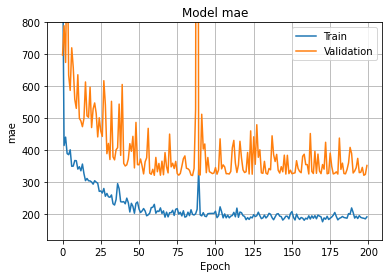

In [69]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

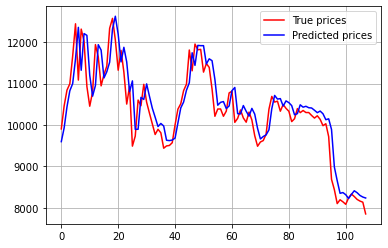

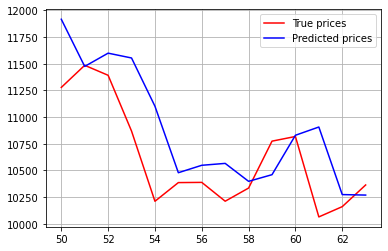

In [70]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

## Program 8-2-3 Coin Price Prediction using LSTM with different hyperparameters

In [51]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 3s - loss: 898.0573 - mae: 898.0573 - val_loss: 336.6580 - val_mae: 336.6580 - 3s/epoch - 10ms/step
Epoch 2/200
250/250 - 2s - loss: 531.9092 - mae: 531.9092 - val_loss: 328.7112 - val_mae: 328.7112 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 508.9943 - mae: 508.9943 - val_loss: 326.1664 - val_mae: 326.1664 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 576.7782 - mae: 576.7782 - val_loss: 322.2176 - val_mae: 322.2176 - 2s/epoch - 7ms/step
Epoch 5/200
250/250 - 2s - loss: 518.6178 - mae: 518.6178 - val_loss: 437.1271 - val_mae: 437.1271 - 2s/epoch - 7ms/step
Epoch 6/200
250/250 - 2s - loss: 542.4874 - mae: 542.4874 - val_loss: 468.1713 - val_mae: 468.1713 - 2s/epoch - 6ms/step
Epoch 7/200
250/250 - 2s - loss: 519.9921 - mae: 519.9921 - val_loss: 510.1328 - val_mae: 510.1328 - 2s/epoch - 6ms/step
Epoch 8/200
250/250 - 2s - loss: 476.4480 - mae: 476.4480 - val_loss: 356.7246 - val_mae: 356.7246 - 2s/epoch - 7ms/step
Epoch 9/200
250/250 - 2s - loss

In [53]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 172.22015380859375 MAE: 172.22015380859375
4/4 [==============================] - 0s 4ms/step
평균절댓값백분율오차(MAPE): [0.02082084]


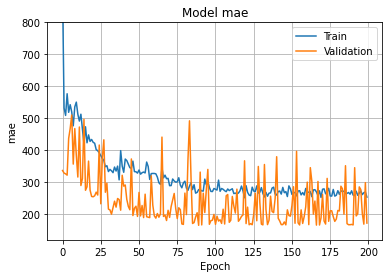

In [54]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

## Program 8-3 Coin Price Prediction using LSTM with multi-channel data

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [33]:
# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy() # 종가, 시가, 고가, 저가를 모두 취함
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]


In [34]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [35]:
# LSTM 모델의 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 2s - loss: 1905.9482 - mae: 1905.9482 - val_loss: 588.2708 - val_mae: 588.2708 - 2s/epoch - 8ms/step
Epoch 2/200
250/250 - 2s - loss: 557.4722 - mae: 557.4722 - val_loss: 658.1739 - val_mae: 658.1739 - 2s/epoch - 6ms/step
Epoch 3/200
250/250 - 2s - loss: 538.6401 - mae: 538.6401 - val_loss: 296.1761 - val_mae: 296.1761 - 2s/epoch - 6ms/step
Epoch 4/200
250/250 - 2s - loss: 529.9370 - mae: 529.9370 - val_loss: 454.2521 - val_mae: 454.2521 - 2s/epoch - 6ms/step
Epoch 5/200
250/250 - 2s - loss: 489.4281 - mae: 489.4281 - val_loss: 353.5490 - val_mae: 353.5490 - 2s/epoch - 6ms/step
Epoch 6/200
250/250 - 2s - loss: 419.8140 - mae: 419.8140 - val_loss: 282.5671 - val_mae: 282.5671 - 2s/epoch - 6ms/step
Epoch 7/200
250/250 - 1s - loss: 487.0833 - mae: 487.0833 - val_loss: 304.9468 - val_mae: 304.9468 - 1s/epoch - 6ms/step
Epoch 8/200
250/250 - 2s - loss: 439.9358 - mae: 439.9358 - val_loss: 275.2450 - val_mae: 275.2450 - 2s/epoch - 6ms/step
Epoch 9/200
250/250 - 2s - los

In [36]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test) # LSTM
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 130.40646362304688 MAE: 130.40646362304688
4/4 [==============================] - 0s 3ms/step
LSTM 평균절댓값백분율오차(MAPE): [0.02532654 0.00559004 0.0170075  0.01551843]


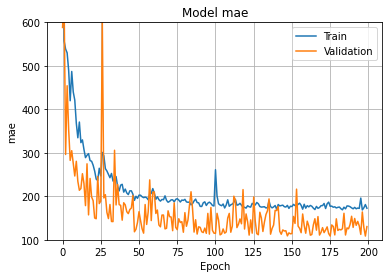

In [37]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [31]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test) # LSTM
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 278.3204650878906 MAE: 278.3204650878906
4/4 [==============================] - 0s 3ms/step
LSTM 평균절댓값백분율오차(MAPE): [0.03431506 0.03394341 0.03532523 0.03245714]


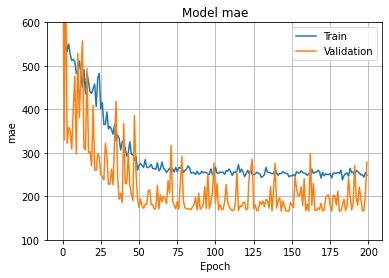

In [32]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()